In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_excel("Medical Inventory Optimaization Dataset.xlsx")

In [35]:
dimension = df.shape
print(dimension)

(14218, 14)


In [25]:
 mean_df = df.mean(numeric_only = True).reset_index( )
mean_df.columns = ['column', 'mean']
print(mean_df)
    

           column          mean
0      Patient_ID  1.201809e+10
1        Quantity  2.231748e+00
2  ReturnQuantity  2.919539e-01
3      Final_Cost  1.248240e+02
4     Final_Sales  2.340383e+02
5          RtnMRP  2.912675e+01


In [29]:
column_means = df.mean( numeric_only=True)
print(column_means)

Patient_ID        1.201809e+10
Quantity          2.231748e+00
ReturnQuantity    2.919539e-01
Final_Cost        1.248240e+02
Final_Sales       2.340383e+02
RtnMRP            2.912675e+01
dtype: float64


In [17]:
column_median = df.median( numeric_only=True)
print(column_median)

Patient_ID        1.201809e+10
Quantity          1.000000e+00
ReturnQuantity    0.000000e+00
Final_Cost        5.365000e+01
Final_Sales       8.642400e+01
RtnMRP            0.000000e+00
dtype: float64


In [19]:
column_mode = df.mode( numeric_only=True)
print(column_mode)

    Patient_ID  Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP
0  12018071649         1               0      49.352          0.0     0.0


In [31]:
column_var = df.var( numeric_only=True)
print(column_var)

Patient_ID        7.897389e+08
Quantity          2.633786e+01
ReturnQuantity    2.700506e+00
Final_Cost        2.160230e+05
Final_Sales       4.505921e+05
RtnMRP            3.321956e+04
dtype: float64


In [33]:
column_stddev = df.std( numeric_only=True)
print(column_stddev)

Patient_ID        28102.293889
Quantity              5.132043
ReturnQuantity        1.643322
Final_Cost          464.782794
Final_Sales         671.261572
RtnMRP              182.262335
dtype: float64


In [37]:
numeric_df = df.select_dtypes(include='number')
range= numeric_df.max( ) - numeric_df.min( )
print(range)

Patient_ID        127135.0
Quantity             150.0
ReturnQuantity        50.0
Final_Cost         33138.0
Final_Sales        39490.0
RtnMRP              8014.0
dtype: float64


In [9]:
print(df.columns)

Index(['Typeofsales', 'Patient_ID', 'Specialisation', 'Dept', 'Dateofbill',
       'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP',
       'Formulation', 'DrugName', 'SubCat', 'SubCat1'],
      dtype='object')


In [11]:
skewness = df.skew(numeric_only = True)
print(skewness)

Patient_ID        -1.366038
Quantity          11.341034
ReturnQuantity    17.172365
Final_Cost        34.508215
Final_Sales       21.006722
RtnMRP            15.797853
dtype: float64


In [13]:
kurtosis = df.kurtosis(numeric_only = True)
print(kurtosis)

Patient_ID           1.620651
Quantity           180.153858
ReturnQuantity     409.416914
Final_Cost        2025.866475
Final_Sales        948.522711
RtnMRP             403.524941
dtype: float64


In [7]:
df.head()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-06-01,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM


In [9]:
df.tail( )

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
14213,Sale,12018099994,Specialisation39,Department1,2022-06-19,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2022-02-24,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,2022-06-27,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,2022-07-30,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES
14217,Sale,12018116820,Specialisation26,Department1,2022-10-24,3,0,46.182,133.800,0.0,Form1,TRAMADOL,INJECTIONS,CENTRAL NERVOUS SYSTEM


In [15]:
duplicate_values = df[df.duplicated('Patient_ID')]
print(duplicate_values)

      Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
46           Sale  12018096500   Specialisation4  Department3 2022-12-15   
100          Sale  12018092174   Specialisation3  Department1 2022-05-05   
112          Sale  12018101517   Specialisation4  Department2 2022-12-15   
114          Sale  12018004314   Specialisation4  Department1 2022-06-19   
140          Sale  12018080755   Specialisation4  Department2 2022-02-20   
...           ...          ...               ...          ...        ...   
14212        Sale  12018004982   Specialisation7  Department1 2022-04-07   
14213        Sale  12018099994  Specialisation39  Department1 2022-06-19   
14214        Sale  12018047025   Specialisation4  Department1 2022-02-24   
14216        Sale  12018044140  Specialisation20  Department1 2022-07-30   
14217        Sale  12018116820  Specialisation26  Department1 2022-10-24   

       Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
46     

In [29]:
null_values_any = df.isnull( ).values.any()
print(null_values_any)

True


In [35]:
null_values_sum = df.isnull().sum( )
print(null_values_sum)

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1668
SubCat1           1692
dtype: int64


In [4]:
Datatype = df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Typeofsales     14218 non-null  object        
 1   Patient_ID      14218 non-null  int64         
 2   Specialisation  14218 non-null  object        
 3   Dept            14218 non-null  object        
 4   Dateofbill      14218 non-null  datetime64[ns]
 5   Quantity        14218 non-null  int64         
 6   ReturnQuantity  14218 non-null  int64         
 7   Final_Cost      14218 non-null  float64       
 8   Final_Sales     14218 non-null  float64       
 9   RtnMRP          14218 non-null  float64       
 10  Formulation     13565 non-null  object        
 11  DrugName        12550 non-null  object        
 12  SubCat          12550 non-null  object        
 13  SubCat1         12526 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)


In [ ]:
univariant plots:
histogram

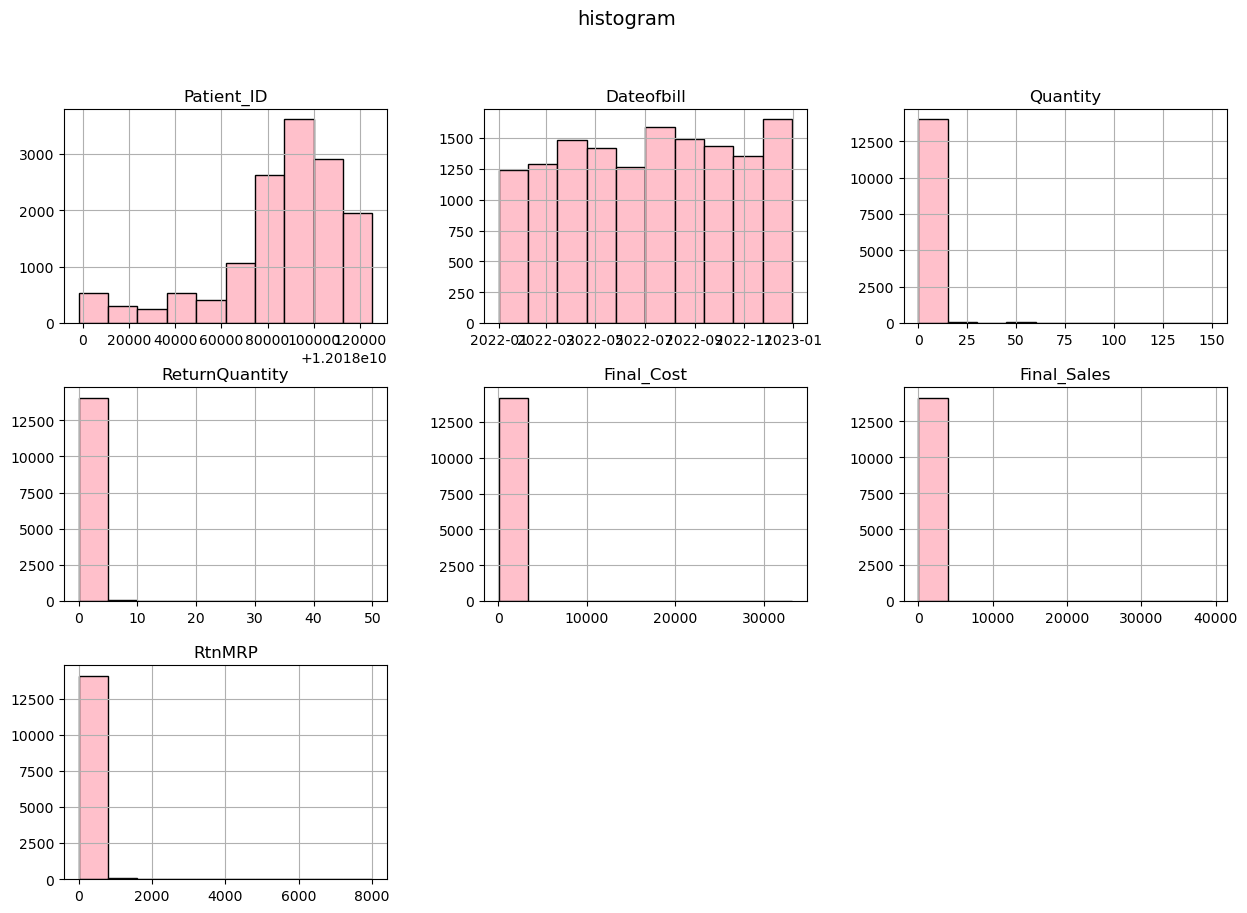

In [21]:

df.hist(figsize=(15,10), bins=10, color = 'pink', edgecolor= 'black' )
plt.suptitle('histogram', fontsize = 14)
plt.show( )

In [ ]:
box plot:

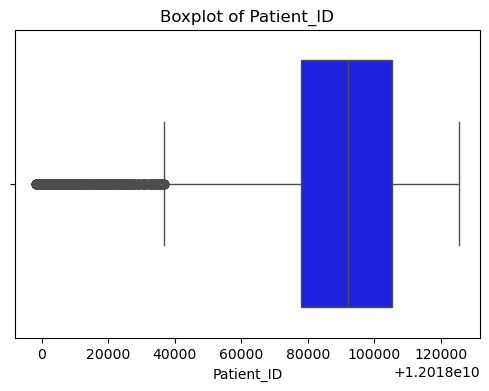

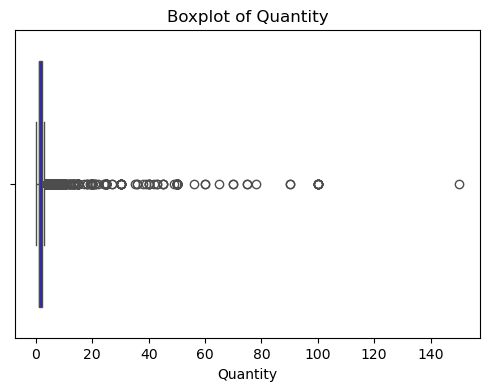

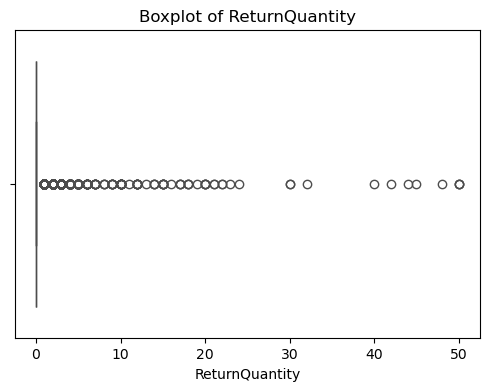

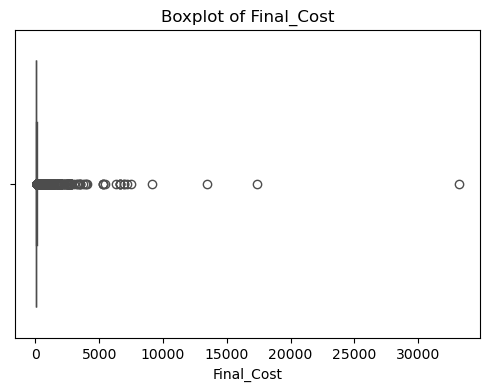

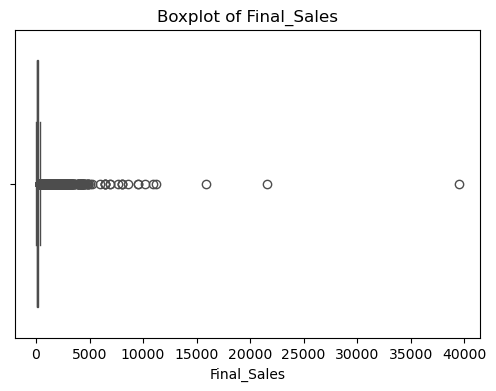

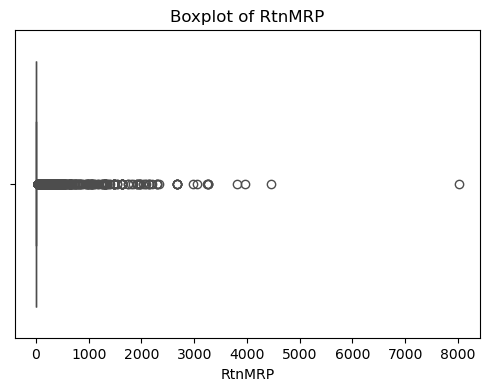

In [38]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f"Boxplot of {col}")
    plt.show( )

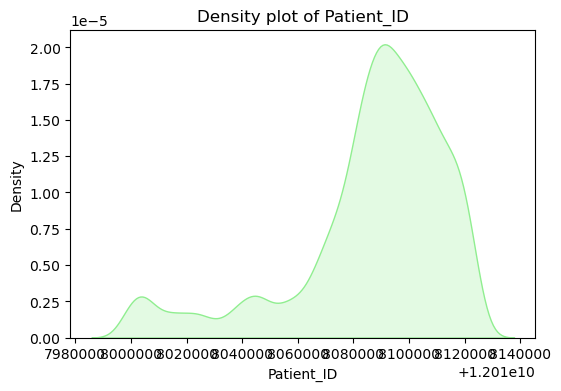

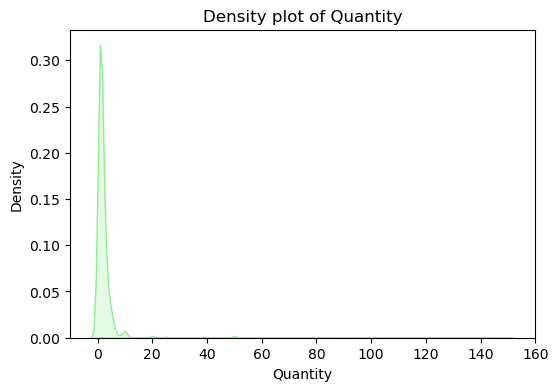

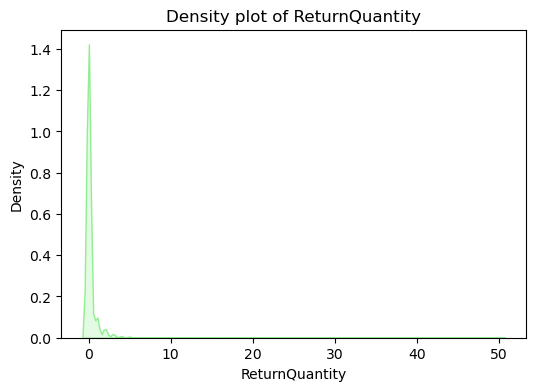

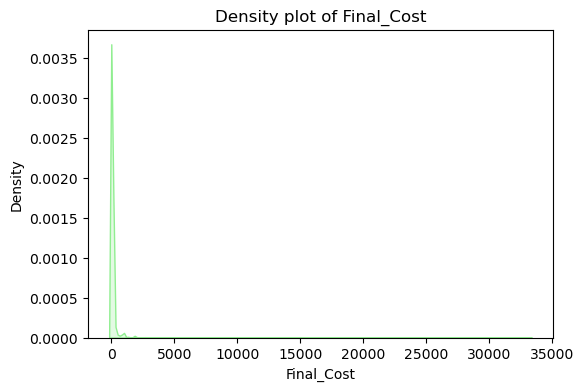

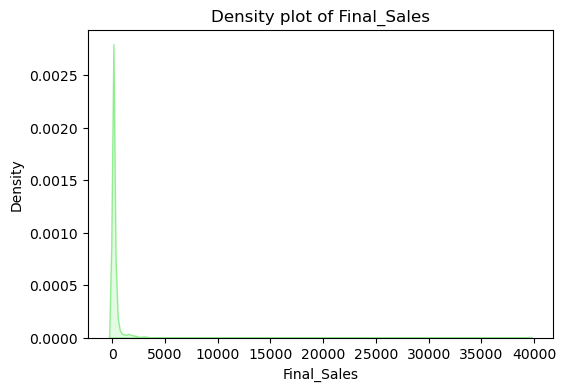

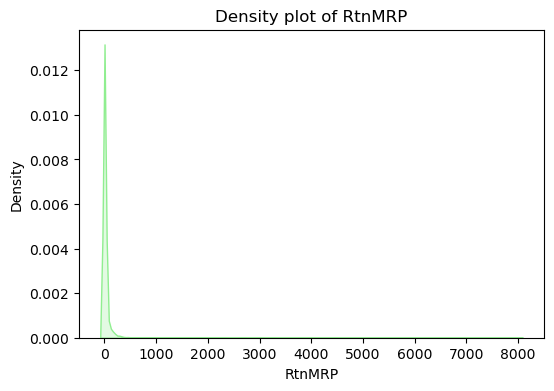

In [44]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col], fill=True, color='lightgreen')
    plt.title(f"Density plot of {col}")
    plt.show()

In [ ]:
correlation heatmap

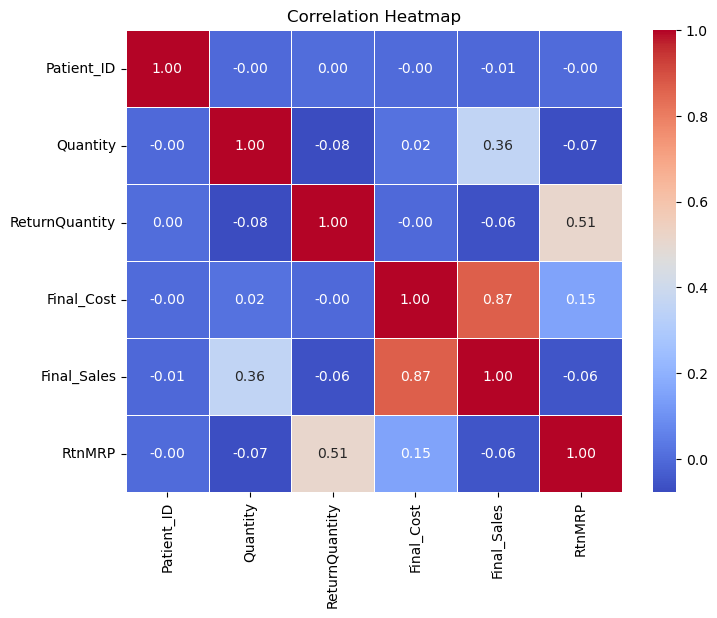

In [48]:


# Compute correlation matrix
corr_matrix = df.corr(numeric_only = True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
scatter plot

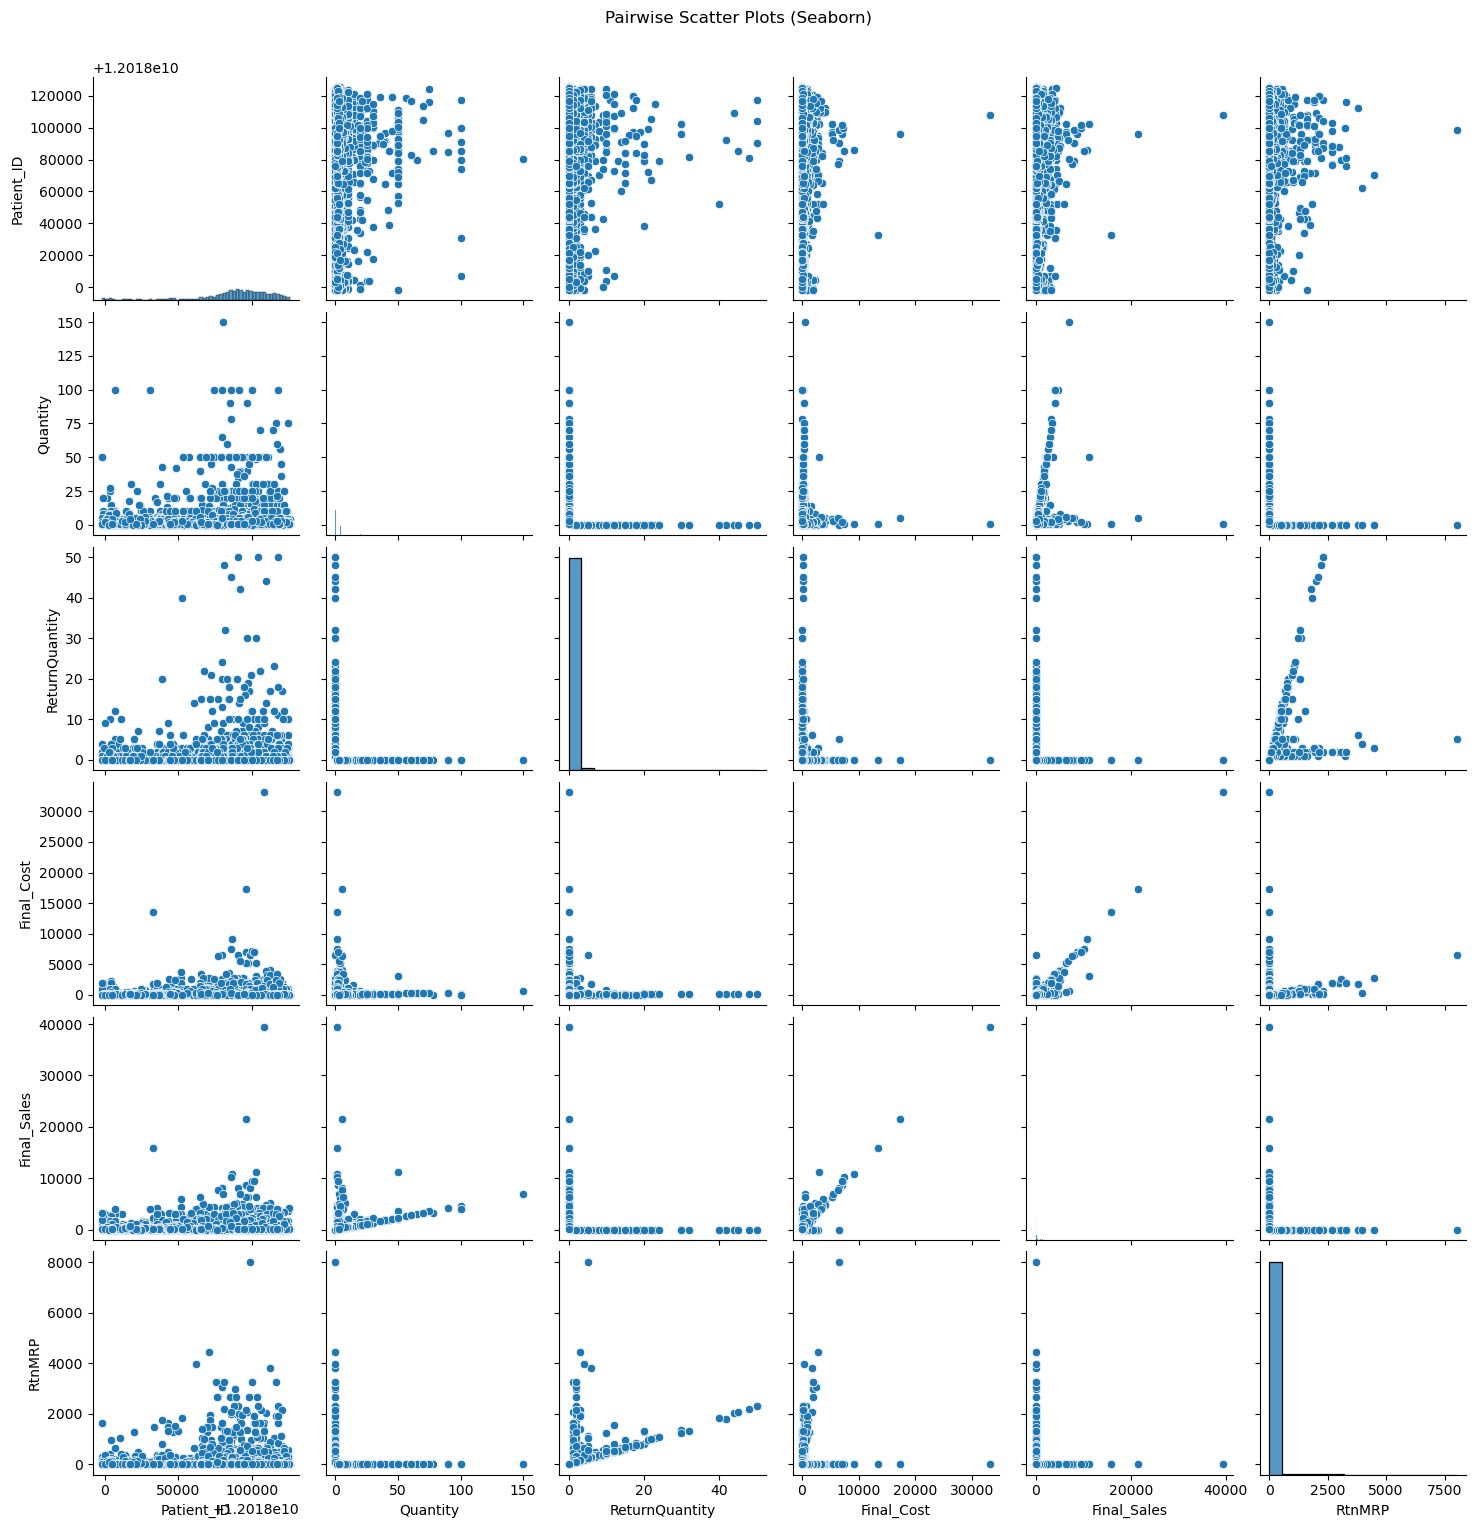

In [57]:


sns.scatterplot(x=df[numeric_cols[0],y=df[numeric_cols[1]],color='blue')
plt.suptitle("Pairwise Scatter Plots (Seaborn)", y=1.02)
plt.show()


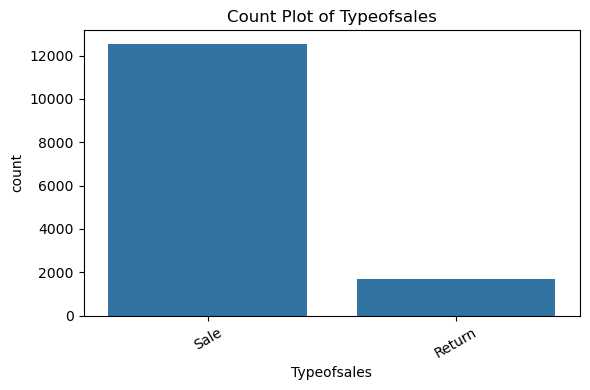

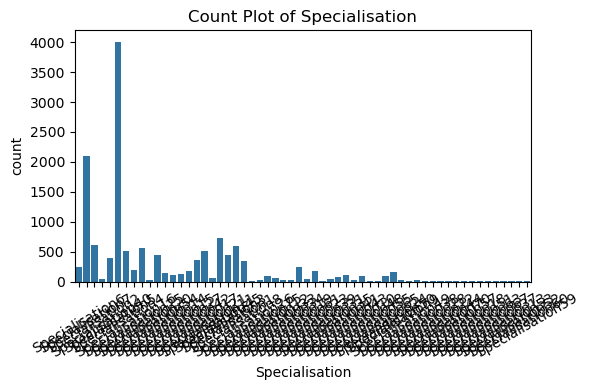

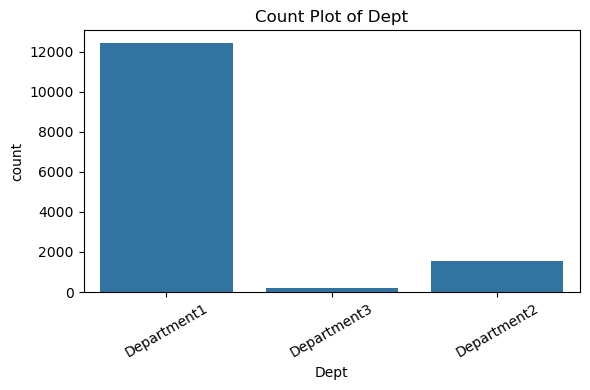

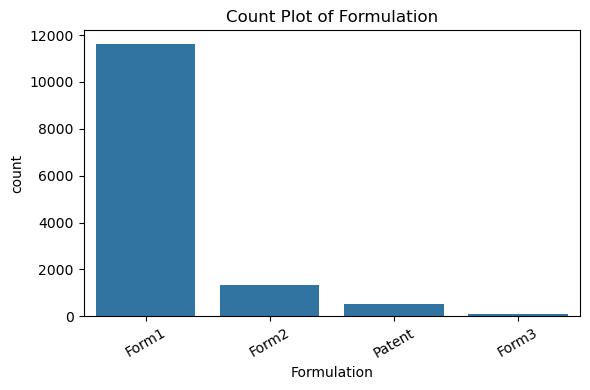

C:\Users\ruhis\AppData\Local\Temp\ipykernel_20680\1213046265.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


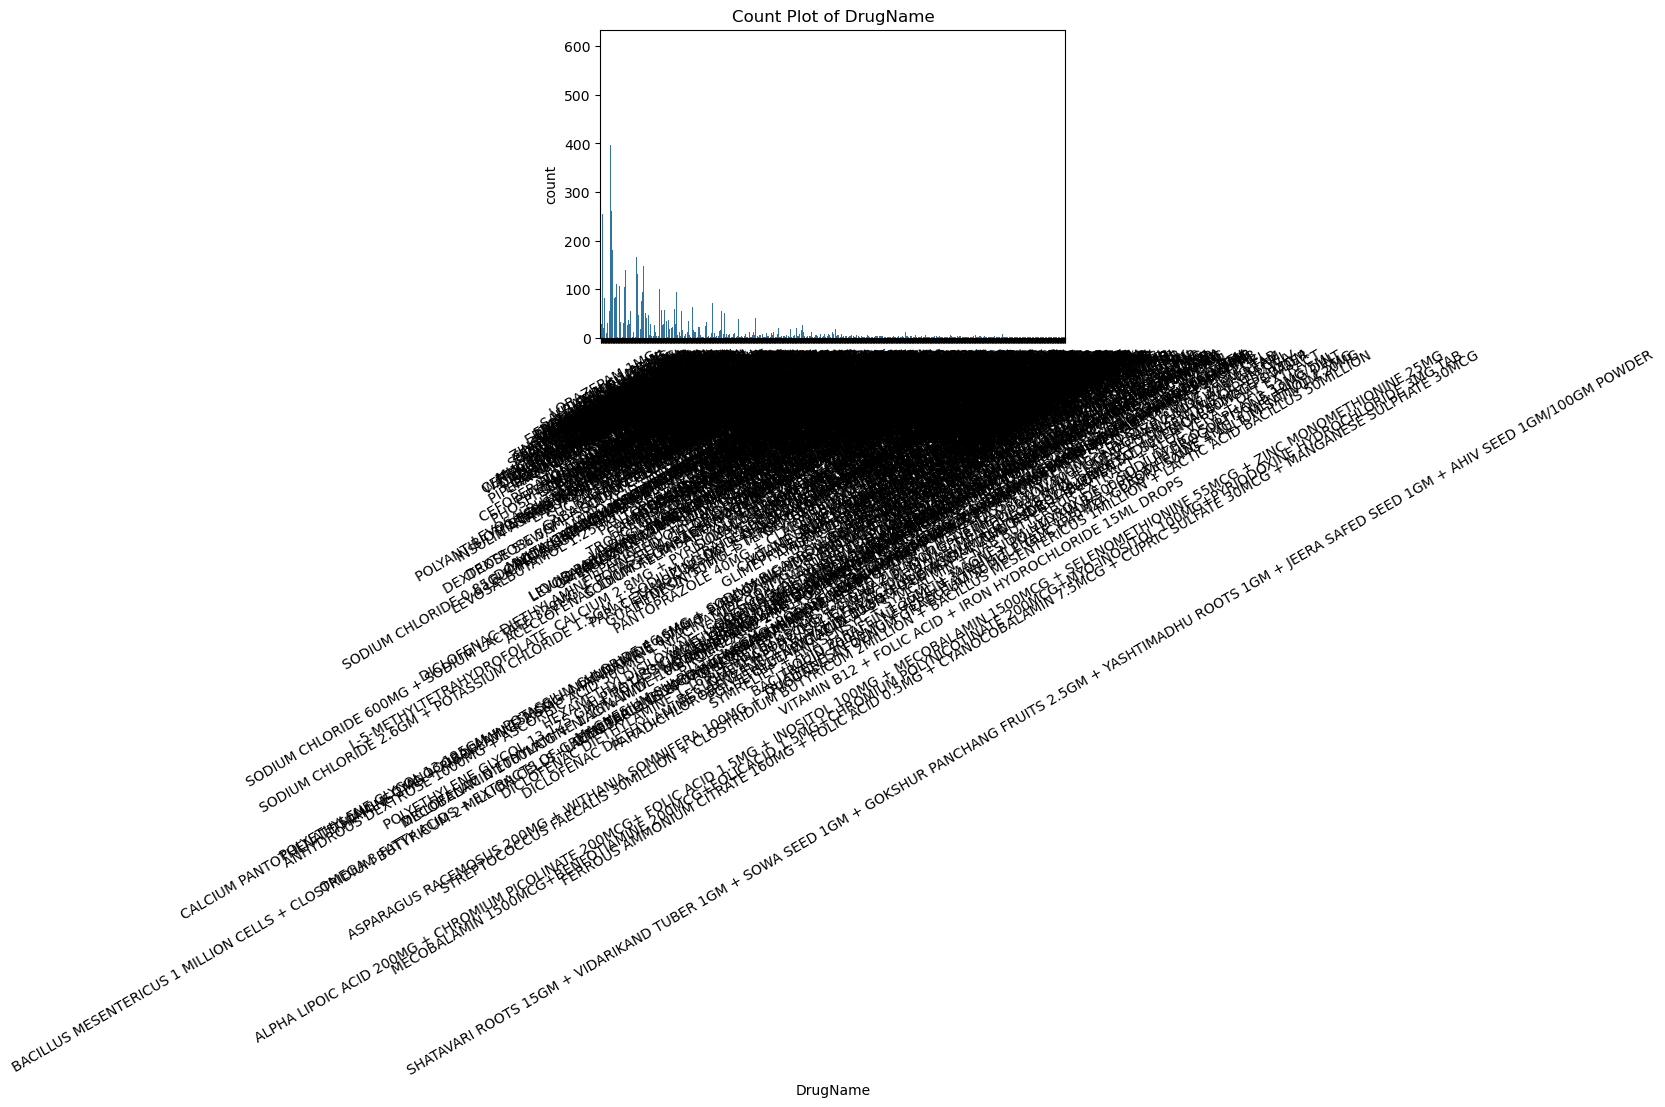

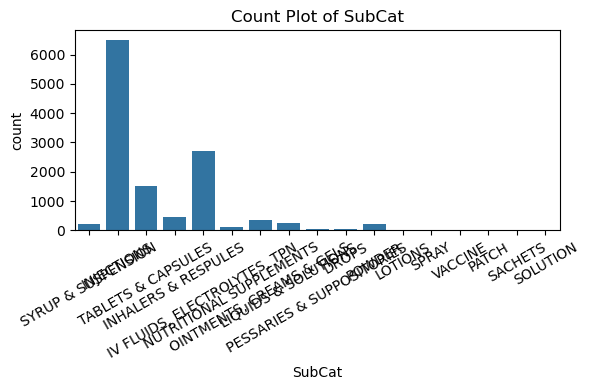

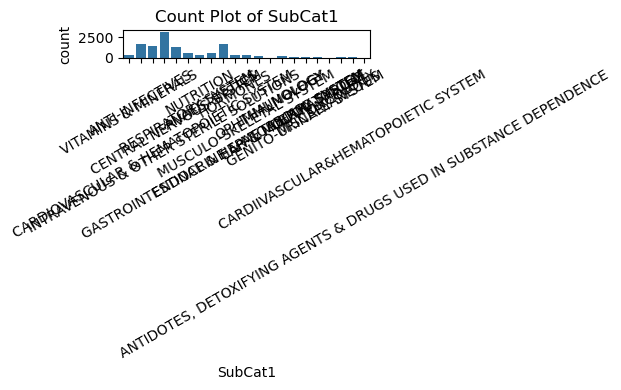

In [59]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

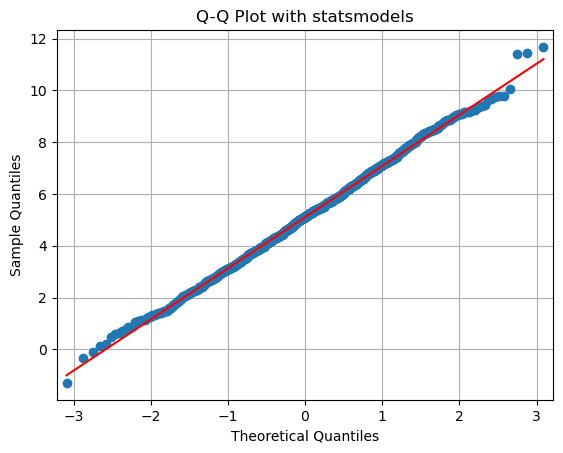

In [41]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example data
df = np.random.normal(loc=5, scale=2, size=1000)

# Q-Q plot
sm.qqplot(df, line='s')  # line='s' adds a 45-degree reference line
plt.title("Q-Q Plot with statsmodels")
plt.grid()
plt.show()


In [61]:
duplicate_values = df[df.duplicated('Patient_ID')]
print(duplicate_values)


      Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
46           Sale  12018096500   Specialisation4  Department3 2022-12-15   
100          Sale  12018092174   Specialisation3  Department1 2022-05-05   
112          Sale  12018101517   Specialisation4  Department2 2022-12-15   
114          Sale  12018004314   Specialisation4  Department1 2022-06-19   
140          Sale  12018080755   Specialisation4  Department2 2022-02-20   
...           ...          ...               ...          ...        ...   
14212        Sale  12018004982   Specialisation7  Department1 2022-04-07   
14213        Sale  12018099994  Specialisation39  Department1 2022-06-19   
14214        Sale  12018047025   Specialisation4  Department1 2022-02-24   
14216        Sale  12018044140  Specialisation20  Department1 2022-07-30   
14217        Sale  12018116820  Specialisation26  Department1 2022-10-24   

       Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
46     

In [17]:


# Check data types
print(df.dtypes)


Typeofsales               object
Patient_ID                 int64
Specialisation            object
Dept                      object
Dateofbill        datetime64[ns]
Quantity                   int64
ReturnQuantity             int64
Final_Cost               float64
Final_Sales              float64
RtnMRP                   float64
Formulation               object
DrugName                  object
SubCat                    object
SubCat1                   object
dtype: object


In [58]:
#typecasting
df['Patient_ID'] = df['Patient_ID'].astype(str)

In [60]:
dup = df.duplicated()
sum(dup)

26

In [62]:
df.drop_duplicates(inplace=True)

In [64]:
dataset = df.duplicated( )
sum(dataset)

0

In [66]:
df.isna().sum( )

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [68]:
# Loop through each categorical column and fill NaNs with mode
for col in df.select_dtypes(include='object').columns:
    mode_value = df[col].mode()[0]
    df.loc[:, col] = df[col].fillna(mode_value)
  


In [70]:
df.isna().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

In [72]:
df['Patient_ID']

0        12018098765
1        12018103897
2        12018101123
3        12018079281
4        12018117928
            ...     
14213    12018099994
14214    12018047025
14215    12018017139
14216    12018044140
14217    12018116820
Name: Patient_ID, Length: 14192, dtype: object

In [74]:
numeric_cols = df.select_dtypes(include='number').columns
outliers_indices = set()


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Get indices of outliers in this column
    outliers_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers_indices.update(outliers_col)

print(f"Number of rows with outliers: {len(outliers_indices)}")

# Optional: view the outlier rows
outlier_rows = df.loc[list(outliers_indices)]
print(outlier_rows)


Number of rows with outliers: 4786
     Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
8192      Return  12018085273  Specialisation19  Department1 2022-02-06   
1           Sale  12018103897   Specialisation7  Department1 2022-07-23   
2           Sale  12018101123   Specialisation2  Department3 2022-06-23   
8194        Sale  12018066772   Specialisation3  Department1 2022-06-06   
8193        Sale  12018082009   Specialisation2  Department1 2022-01-05   
...          ...          ...               ...          ...        ...   
8180        Sale  12018024326  Specialisation23  Department1 2022-07-13   
8181      Return  12018105403   Specialisation7  Department1 2022-08-22   
8185        Sale  12018096496  Specialisation14  Department1 2022-05-12   
8187        Sale  12018104234   Specialisation8  Department1 2022-08-14   
8188      Return  12018065075  Specialisation11  Department1 2022-08-13   

      Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP 

In [76]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Start with all True mask (all rows are valid initially)
non_outlier_mask = pd.Series(True, index=df.index)

# Loop through each numeric column to apply IQR rule
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update mask: only keep rows within bounds for each column
    non_outlier_mask &= df[col].between(lower_bound, upper_bound)

# Apply mask to keep only non-outlier rows
df_clean = df[non_outlier_mask]

print(df_clean)


      Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
0            Sale  12018098765   Specialisation6  Department1 2022-06-01   
3            Sale  12018079281  Specialisation40  Department1 2022-03-17   
4            Sale  12018117928   Specialisation5  Department1 2022-12-21   
6            Sale  12018097585   Specialisation2  Department1 2022-05-22   
7            Sale  12018077721   Specialisation4  Department1 2022-01-12   
...           ...          ...               ...          ...        ...   
14212        Sale  12018004982   Specialisation7  Department1 2022-04-07   
14213        Sale  12018099994  Specialisation39  Department1 2022-06-19   
14214        Sale  12018047025   Specialisation4  Department1 2022-02-24   
14216        Sale  12018044140  Specialisation20  Department1 2022-07-30   
14217        Sale  12018116820  Specialisation26  Department1 2022-10-24   

       Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0      

In [5]:
df_cleaned = df

In [80]:
df_cleaned

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,2022-06-01,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,2022-07-23,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,2022-06-23,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,2022-03-17,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,2022-12-21,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,Sale,12018099994,Specialisation39,Department1,2022-06-19,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2022-02-24,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,2022-06-27,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,2022-07-30,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES


In [13]:

df_cleaned.to_excel(r'D:\project_files\df_cleaned.xlsx', index=False)

In [89]:
df_cleaned.shape

(14192, 14)

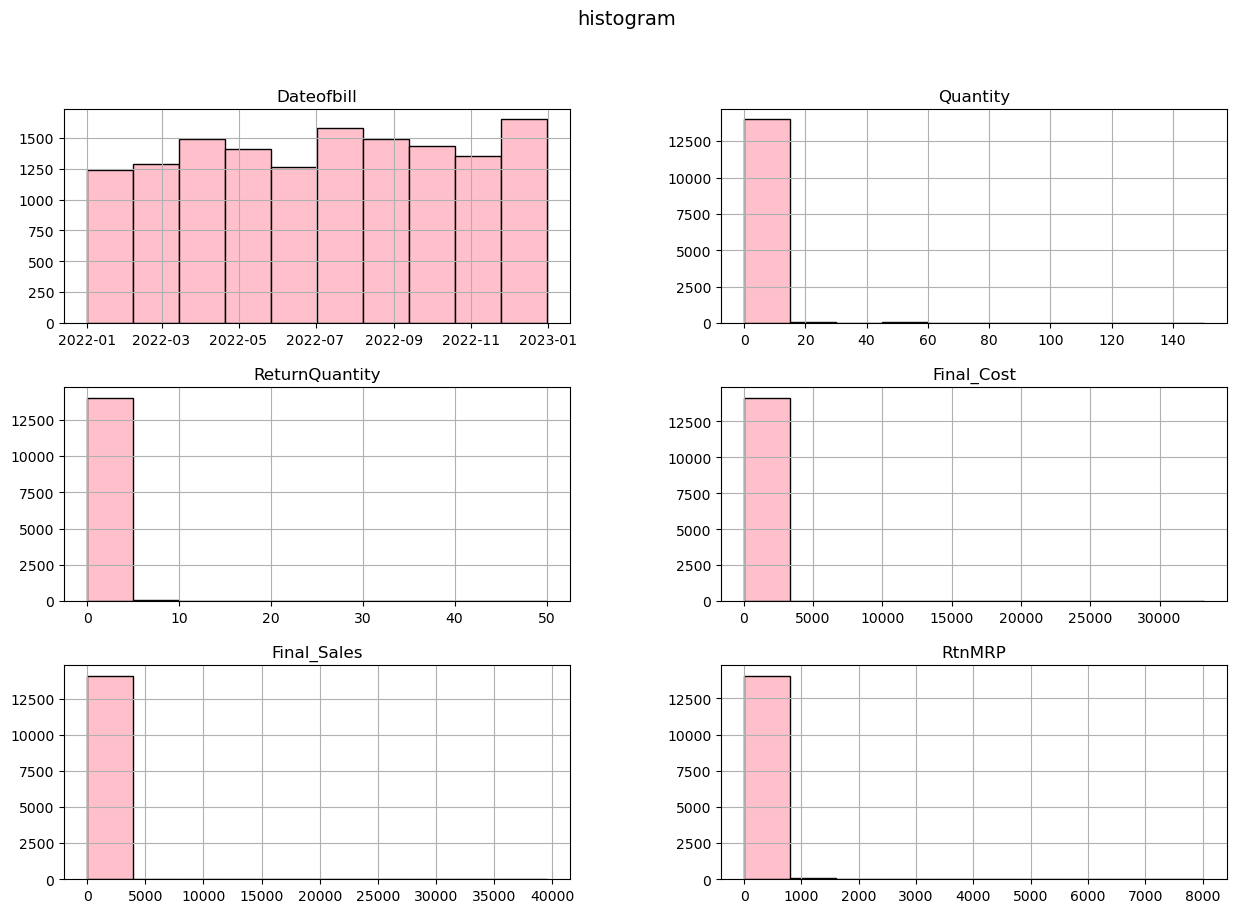

In [90]:
df_cleaned.hist(figsize=(15,10), bins=10, color = 'pink', edgecolor= 'black' )
plt.suptitle('histogram', fontsize = 14)
plt.show( )

In [94]:
df_cleaned['Patient_ID']

0        12018098765
1        12018103897
2        12018101123
3        12018079281
4        12018117928
            ...     
14213    12018099994
14214    12018047025
14215    12018017139
14216    12018044140
14217    12018116820
Name: Patient_ID, Length: 14192, dtype: object

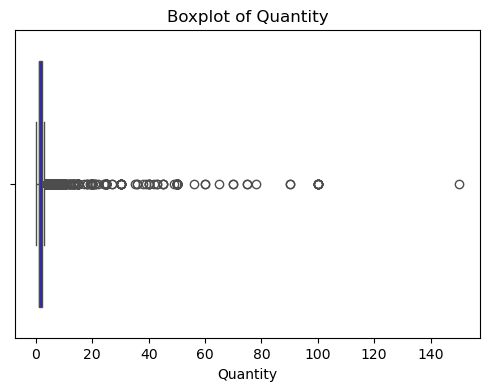

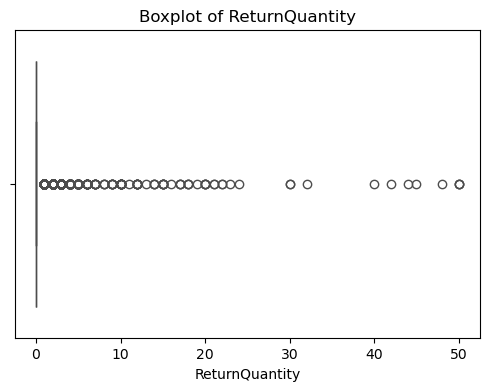

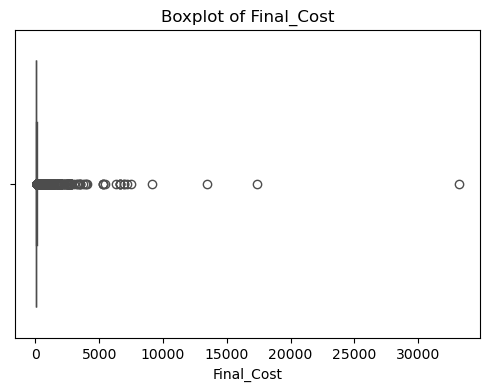

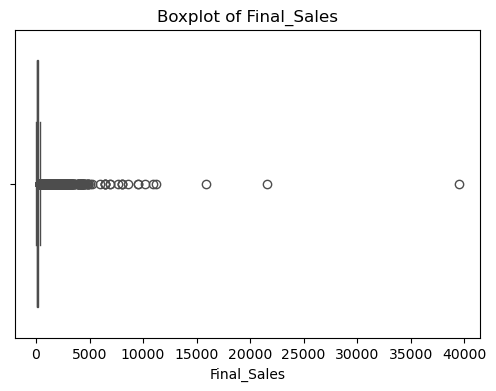

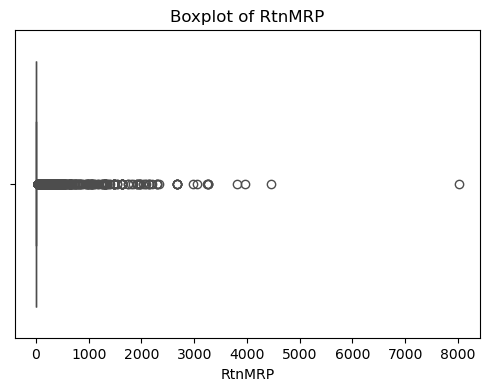

In [96]:
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='blue')
    plt.title(f"Boxplot of {col}")
    plt.show( )

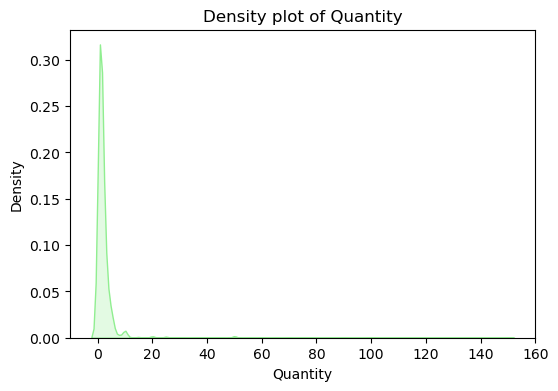

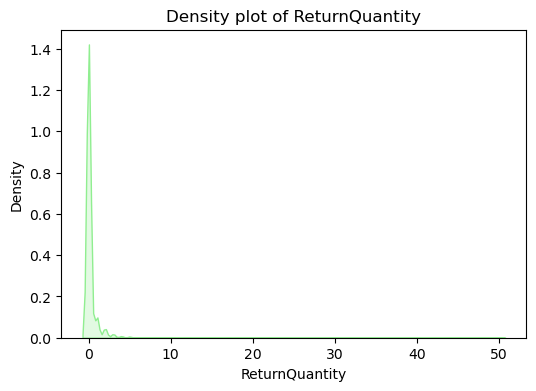

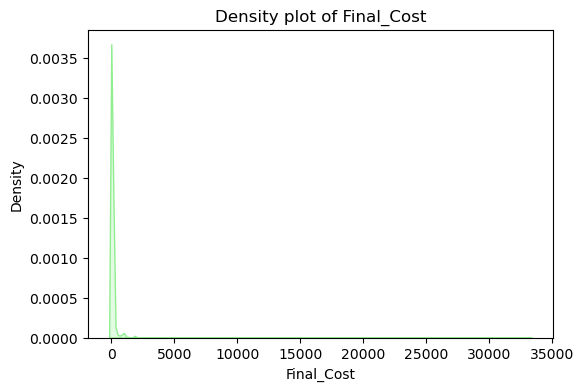

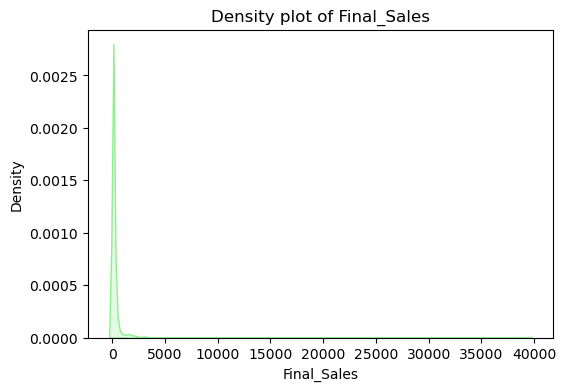

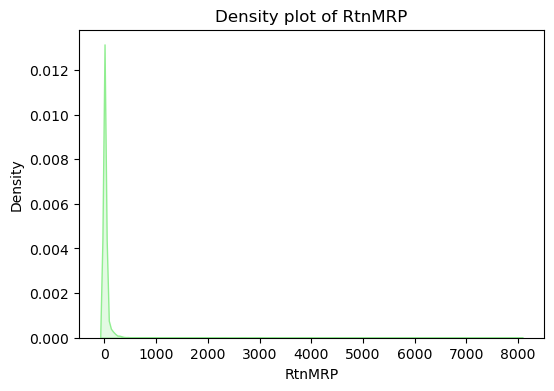

In [97]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_cleaned[col], fill=True, color='lightgreen')
    plt.title(f"Density plot of {col}")
    plt.show()

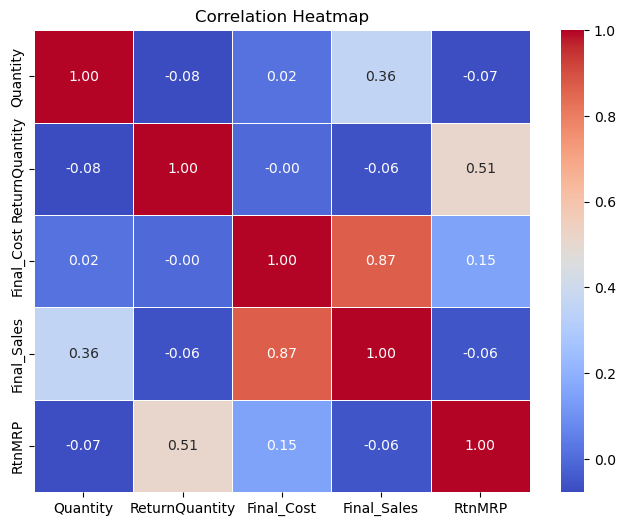

In [99]:
# Compute correlation matrix
corr_matrix = df_cleaned.corr(numeric_only = True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


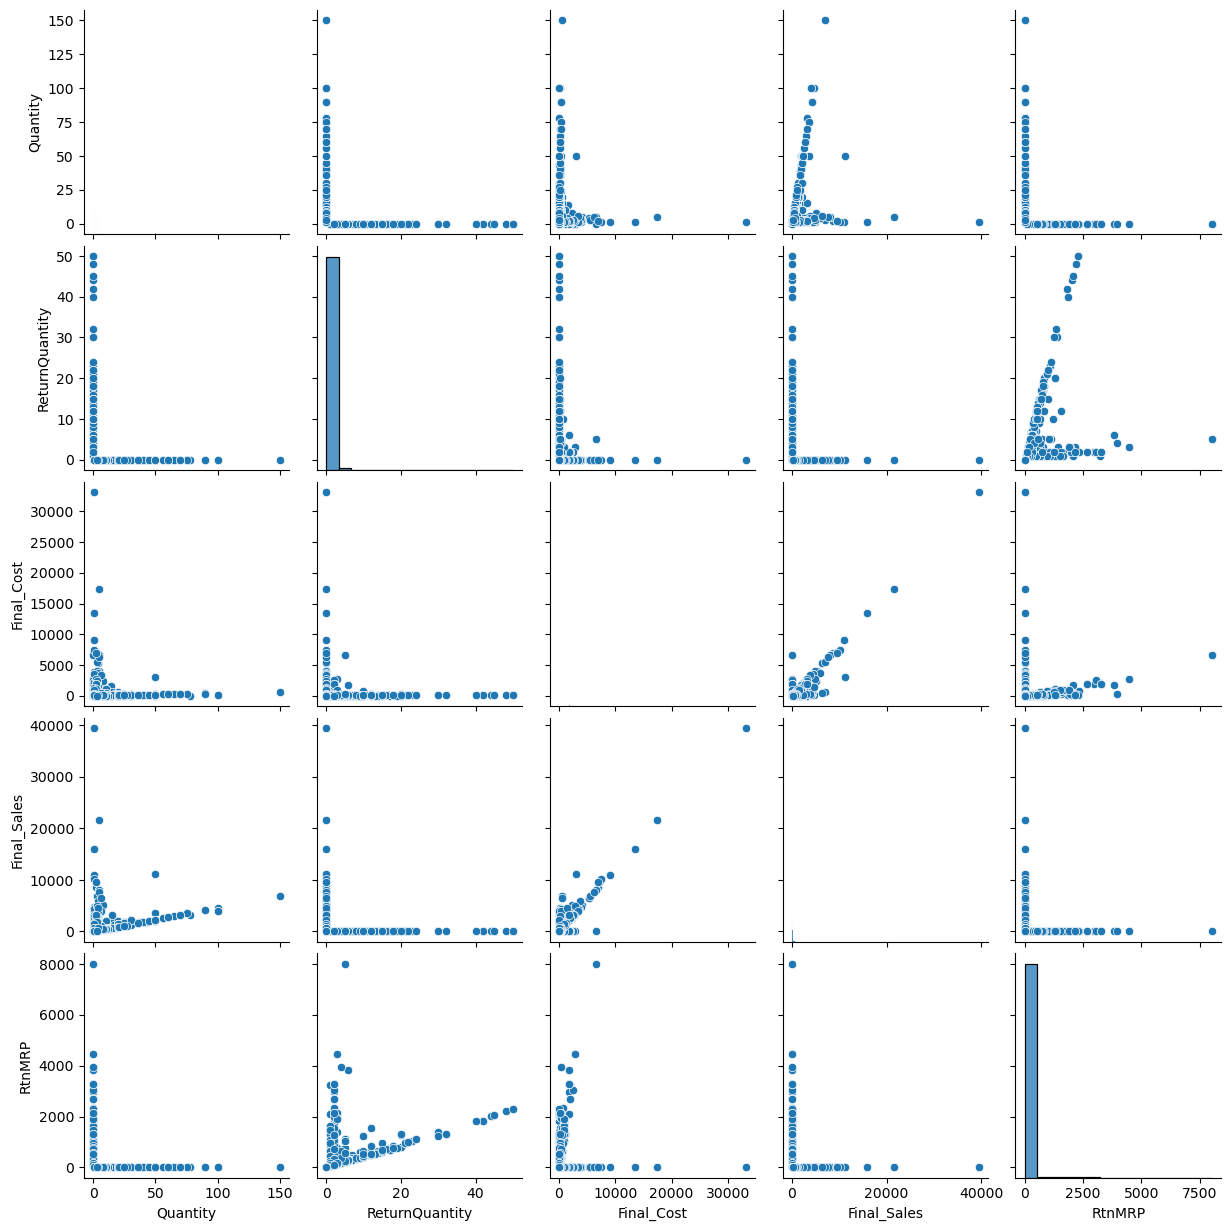

In [108]:

# Create pairwise scatter plots
sns.pairplot(df_cleaned, kind='scatter', diag_kind='hist')

# Show all plots
plt.show()

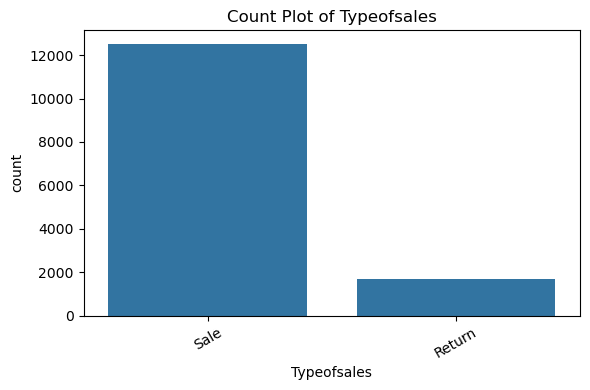

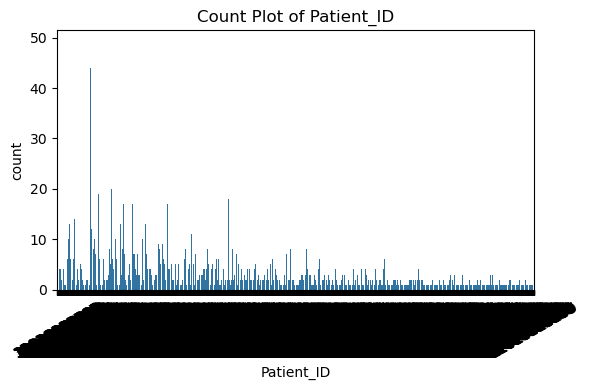

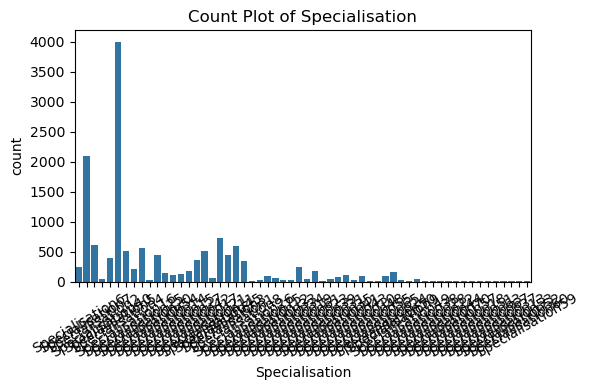

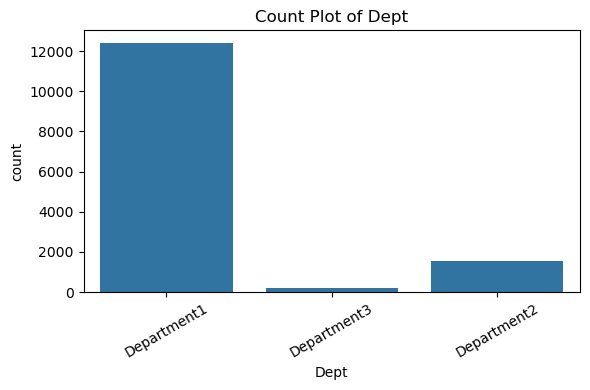

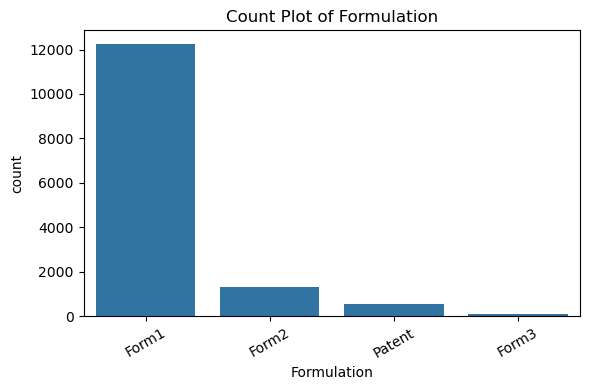

C:\Users\ruhis\AppData\Local\Temp\ipykernel_12520\3257534605.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


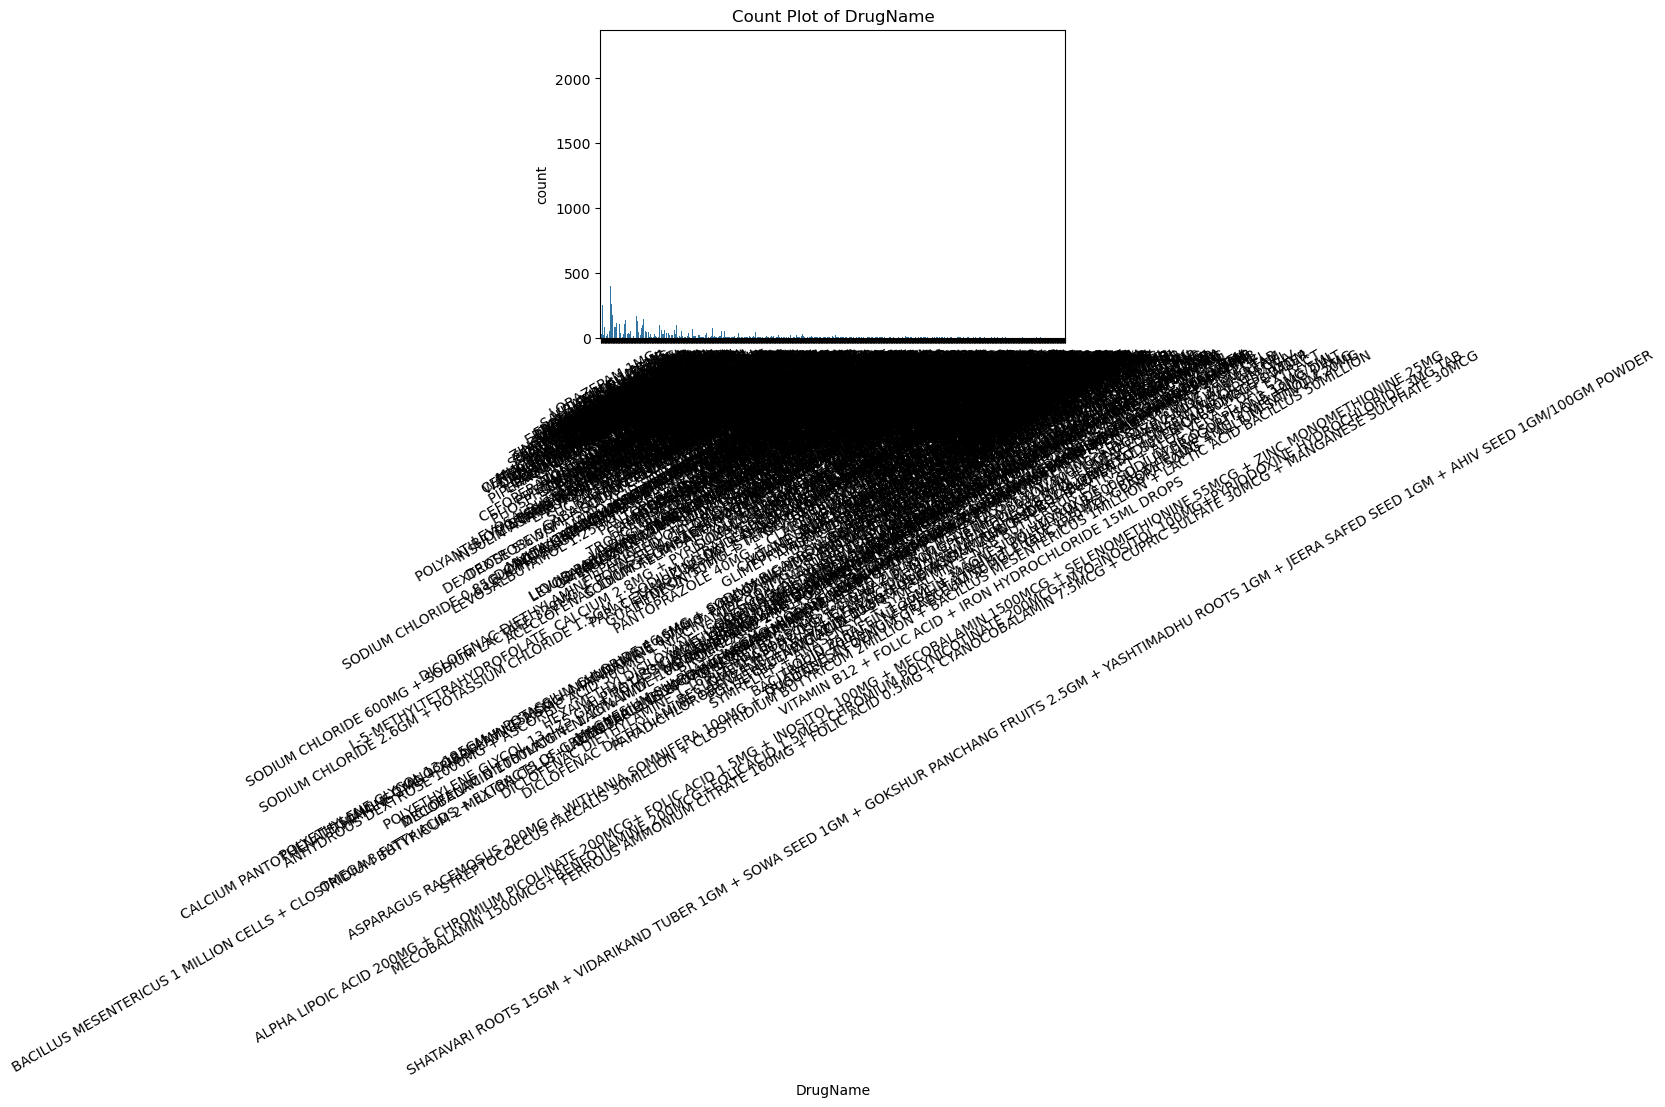

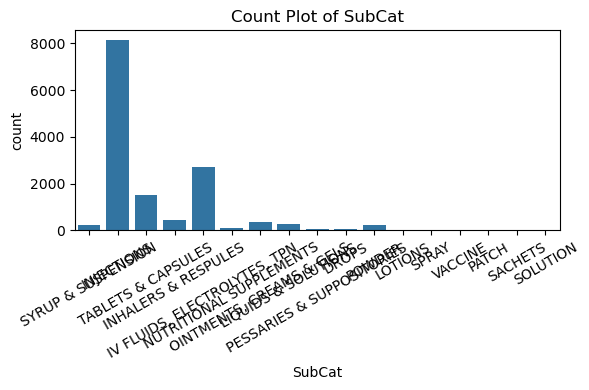

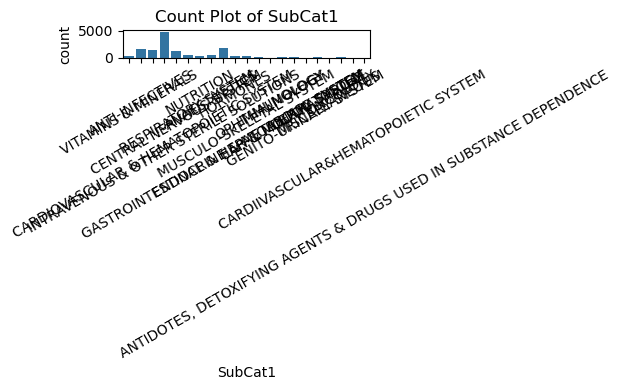

In [104]:
categorical_columns = df_cleaned.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

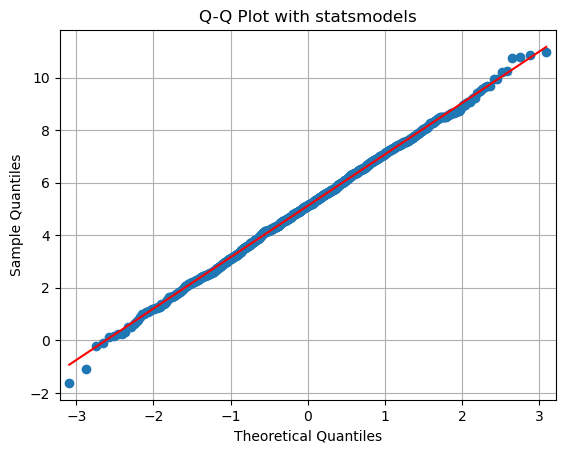

In [45]:
df_cleaned = np.random.normal(loc=5, scale=2, size=1000)

# Q-Q plot
sm.qqplot(df_cleaned, line='s')  # line='s' adds a 45-degree reference line
plt.title("Q-Q Plot with statsmodels")
plt.grid()
plt.show()


In [135]:
from sklearn.preprocessing import RobustScaler
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(exclude=['number']).columns

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

scaled_numeric_df = pd.DataFrame(scaled_data, columns=numeric_cols, index=df_cleaned.index)

final_df = pd.concat([scaled_numeric_df, df_cleaned[categorical_cols]], axis=1)
print(final_df.head())


   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Typeofsales  \
0       0.0             0.0    0.053024    -0.204003     0.0        Sale   
1       0.0             0.0   21.750274     6.491502     0.0        Sale   
2       0.0             0.0   21.921483    29.422778     0.0        Sale   
3       1.0             0.0   -0.391367    -0.040404     0.0        Sale   
4       0.0             0.0   -0.402440    -0.344861     0.0        Sale   

    Patient_ID    Specialisation         Dept Dateofbill Formulation  \
0  12018098765   Specialisation6  Department1 2022-06-01       Form1   
1  12018103897   Specialisation7  Department1 2022-07-23       Form1   
2  12018101123   Specialisation2  Department3 2022-06-23       Form2   
3  12018079281  Specialisation40  Department1 2022-03-17       Form1   
4  12018117928   Specialisation5  Department1 2022-12-21       Form1   

                            DrugName              SubCat  \
0          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSP

In [137]:
final_df.dtypes

Quantity                 float64
ReturnQuantity           float64
Final_Cost               float64
Final_Sales              float64
RtnMRP                   float64
Typeofsales               object
Patient_ID                object
Specialisation            object
Dept                      object
Dateofbill        datetime64[ns]
Formulation               object
DrugName                  object
SubCat                    object
SubCat1                   object
dtype: object

In [151]:
final_df.to_excel(r'D:\project_files\final_df.xlsx', index=False)


In [141]:
import os
print(os.getcwd())


C:\Users\ruhis\OneDrive


In [143]:
time()

CPU times: total: 0 ns
Wall time: 0 ns


()

In [147]:
#final_df["Patient_ID"] = final_df["Patient_ID"].astyp(str)